In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras import backend as K

import os
import matplotlib.image as mpimg

In [2]:
train = r"C:\Users\JaiGa\OneDrive\Documents\Cats and Dogs\data\train"
classes = os.listdir(train)
classes

['cats', 'dogs']

In [3]:
test = r"C:\Users\JaiGa\OneDrive\Documents\Cats and Dogs\data\test"
classes2= os.listdir(test)
classes2

['Predict']

In [4]:
img_width = 200
img_height = 200

train_samples = 30
epochs = 5
batch_size = 30

# Check for TensorFlow or Thieno
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [5]:
model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (5,5) convulonational windows size
model.add(Conv2D(32, (5, 5), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(64, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [6]:
import keras
from keras import optimizers
from keras.optimizers import SGD
model.compile(loss='binary_crossentropy', 
             optimizer = SGD(lr=0.001, momentum=0.9),
              metrics=['accuracy'])

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [8]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=30,
    class_mode='binary')

Found 40 images belonging to 2 classes.


In [10]:
print(train_generator.class_indices)

{'cats': 0, 'dogs': 1}


In [11]:
imgs, labels = next(train_generator)

In [12]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

10
0.0


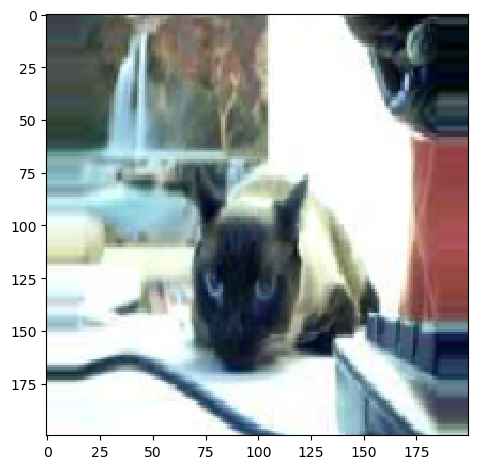

0.0


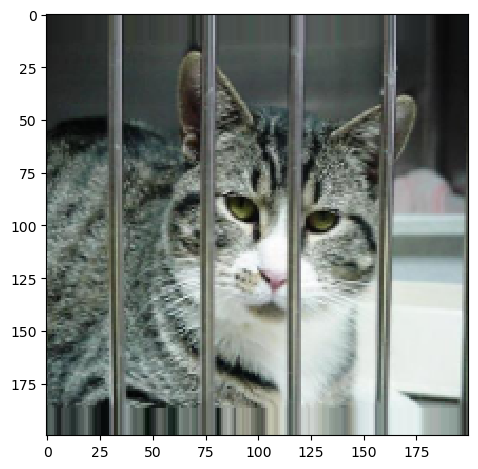

1.0


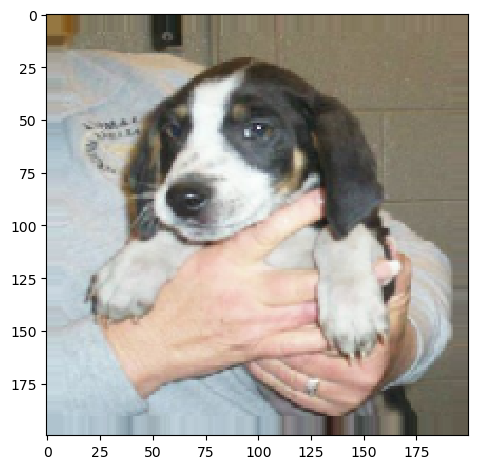

1.0


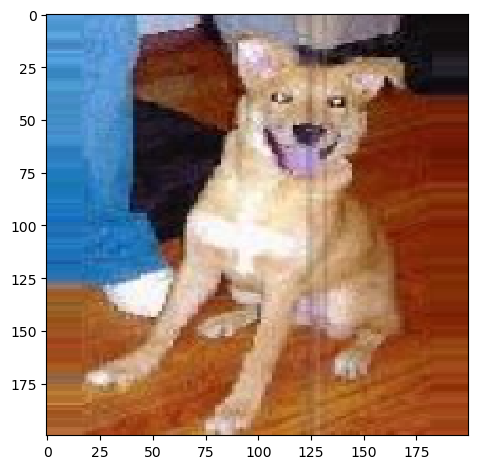

0.0


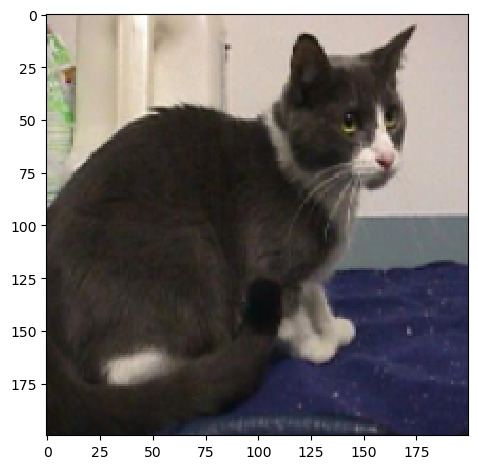

0.0


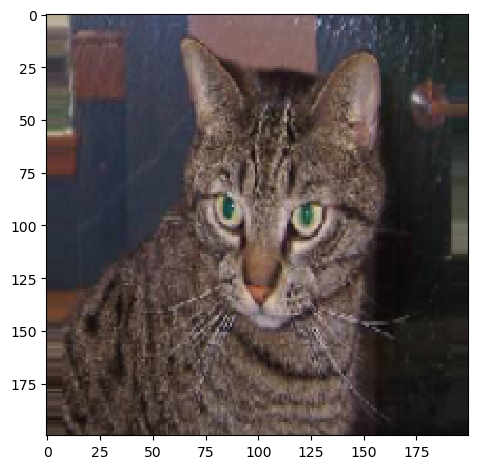

1.0


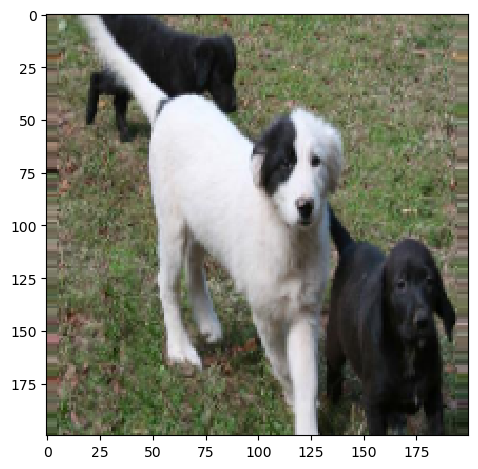

1.0


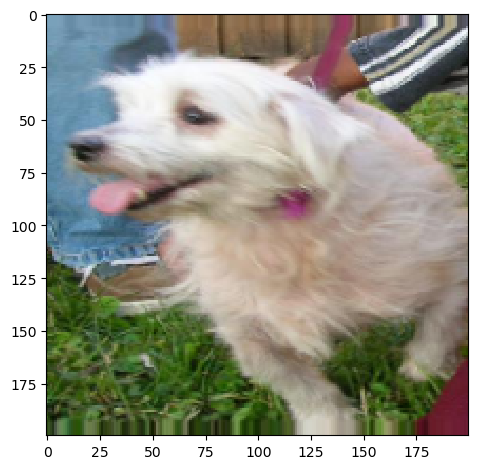

0.0


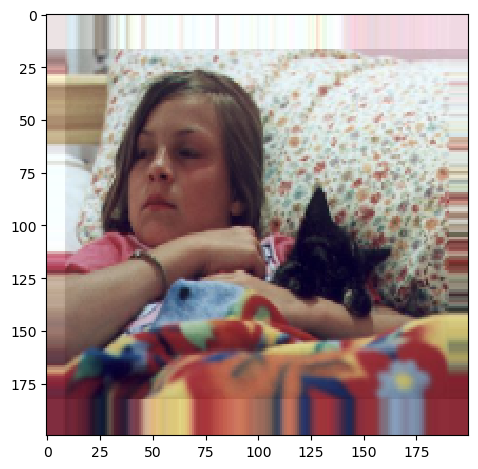

0.0


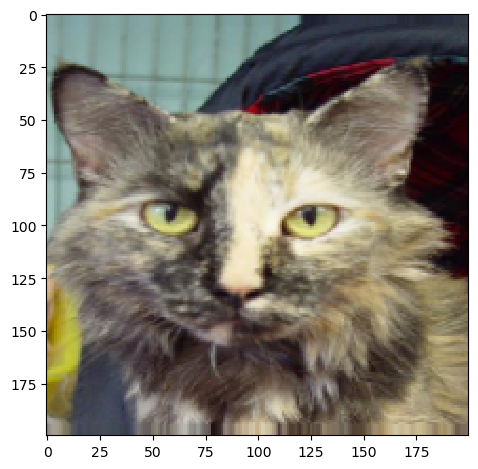

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [14]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.6983 - accuracy: 0.4667
Epoch 2/100
1/1 [==============================] - 0s 499ms/step - loss: 0.7160 - accuracy: 0.3000
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 0.7268 - accuracy: 0.5333
Epoch 4/100
1/1 [==============================] - 0s 438ms/step - loss: 0.7814 - accuracy: 0.4000
Epoch 5/100
1/1 [==============================] - 1s 1s/step - loss: 0.6953 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 441ms/step - loss: 0.6815 - accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 430ms/step - loss: 0.7011 - accuracy: 0.2000
Epoch 8/100
1/1 [==============================] - 1s 1s/step - loss: 0.6894 - accuracy: 0.5333
Epoch 9/100
1/1 [==============================] - 1s 1s/step - loss: 0.6926 - accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 1s 1s/step - loss: 0.7053 - accuracy: 0.5333
Epoch 11/100
1/1 [=========

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 32)      2432      
                                                                 
 activation (Activation)     (None, 196, 196, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 94, 94, 64)        51264     
                                                                 
 activation_1 (Activation)   (None, 94, 94, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                    

In [16]:
from os import listdir
from os.path import isfile, join
predict_test=r"C:/Users/JaiGa/OneDrive/Documents/Cats and Dogs/data/test/predict/"
onlyfiles = [f for f in listdir(predict_test) if isfile(join(predict_test, f))]
print(onlyfiles)

['1001.jpg', '1002.jpg', '1003.jpg', '1004.jpg', '1005.jpg', '1006.jpg', '1007.jpg', '1008.jpg', '1009.jpg', '101.jpg', '1010.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg', '108.jpg', '109.jpg', '110.jpg']


In [20]:
import keras.utils as image
dog_counter = 0 
cat_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_test+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    pred = model.predict(images, batch_size=1)
    pred = pred[0][0]
    print(pred)
    
    if pred == 0:
        print(file + ": " + 'cat')
        cat_counter += 1
    else:
        print(file + ": " + 'dog')
        dog_counter += 1
print("Total Dogs :",dog_counter)
print("Total Cats :",cat_counter)

1/1 [==============================] - 0s 123ms/step
1.2734584e-32
1001.jpg: dog
1/1 [==============================] - 0s 30ms/step
1.0
1002.jpg: dog
1/1 [==============================] - 0s 43ms/step
0.99999905
1003.jpg: dog
1/1 [==============================] - 0s 24ms/step
5.401646e-28
1004.jpg: dog
1/1 [==============================] - 0s 56ms/step
1.0
1005.jpg: dog
1/1 [==============================] - 0s 33ms/step
0.0
1006.jpg: cat
1/1 [==============================] - 0s 32ms/step
0.0
1007.jpg: cat
1/1 [==============================] - 0s 31ms/step
1.0
1008.jpg: dog
1/1 [==============================] - 0s 53ms/step
1.0
1009.jpg: dog
1/1 [==============================] - 0s 33ms/step
0.40828374
101.jpg: dog
1/1 [==============================] - 0s 33ms/step
0.0
1010.jpg: cat
1/1 [==============================] - 0s 42ms/step
1.9678462e-25
102.jpg: dog
1/1 [==============================] - 0s 37ms/step
2.3722364e-25
103.jpg: dog
1/1 [==============================] - 

In [17]:
test_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [18]:
test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=30,
    class_mode='binary')

Found 20 images belonging to 1 classes.


In [19]:
history = model.evaluate_generator(
    test_generator)
print(history)

[0.6311919093132019, 0.6000000238418579]
